# AIPI 590 - XAI | Assignment #06



## Akalpit Dawkhar

### **Explainable Techniques-2**

### Overview

In [9]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "Explainable-techniques/Assignment-6/" # Change to your repo name
git_path = 'https://github.com/akalpit23/Explainable-techniques.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'Assignment-6/'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

rm: ./sample_data: No such file or directory
Cloning into 'Explainable-techniques'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 114 (delta 54), reused 75 (delta 27), pack-reused 0 (from 0)
Receiving objects: 100% (114/114), 4.59 MiB | 4.69 MiB/s, done.
Resolving deltas: 100% (54/54), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 15.5 MB/s eta 0:00:00
[Errno 2] No such file or directory: 'Explainable-techniques/Assignment-6/Assignment-6/'
/Users/akalpitdawkhar/Desktop/School/SEM 3/XAI/Explainable-techniques/Assignment-6
Explainable-techniques/
Explainable_Techniques_Assignment_06.ipynb
requirements.txt


In [10]:
!pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement alepython (from versions: none)
ERROR: No matching distribution found for alepython


In [30]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.inspection import PartialDependenceDisplay ,partial_dependence # Updated import
from alibi.explainers import ALE, plot_ale  # Importing ALE and the correct plotting function

In [19]:
# Step 2: Load your dataset
df = sns.load_dataset('titanic')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


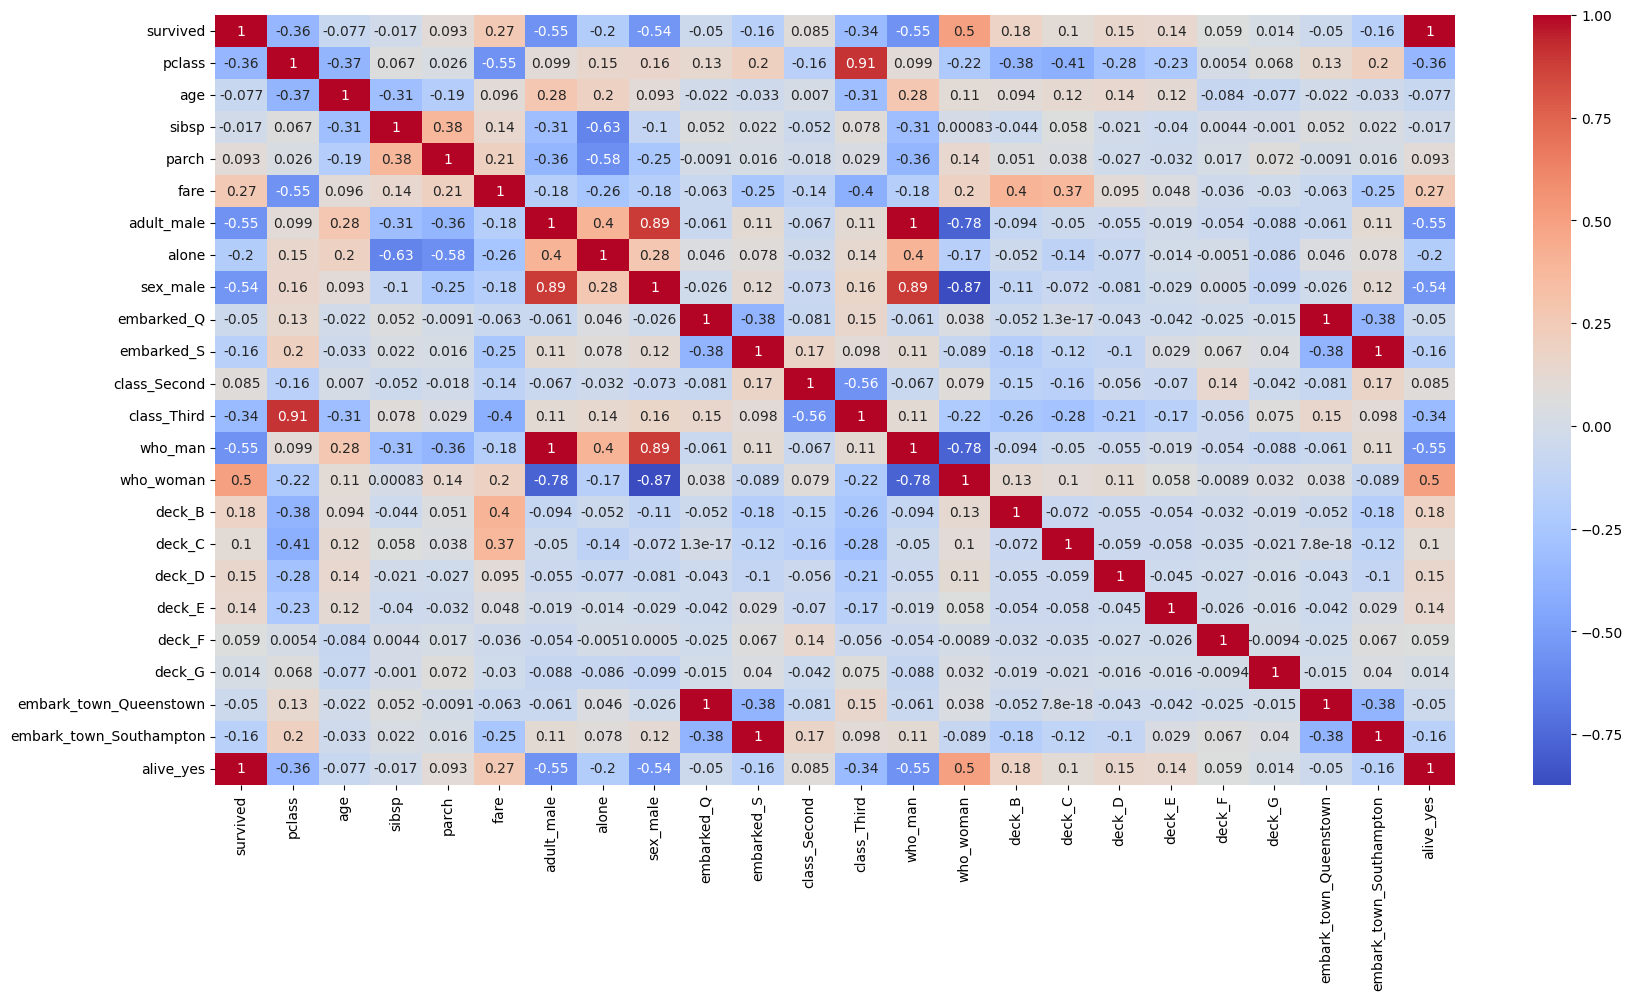

In [17]:

# Step 3: Exploratory Data Analysis (EDA)

# Convert categorical variables to numerical via one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Drop rows with missing values for simplicity
df_encoded = df_encoded.dropna()

# Visualize correlation heatmap for numeric columns only
plt.figure(figsize=(20,10))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

# Step 4: Data Preprocessing
X = df_encoded.drop('survived', axis=1)  # Assuming "survived" is the target variable
y = df_encoded['survived']

In [4]:
# Step 5: Model Selection & Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

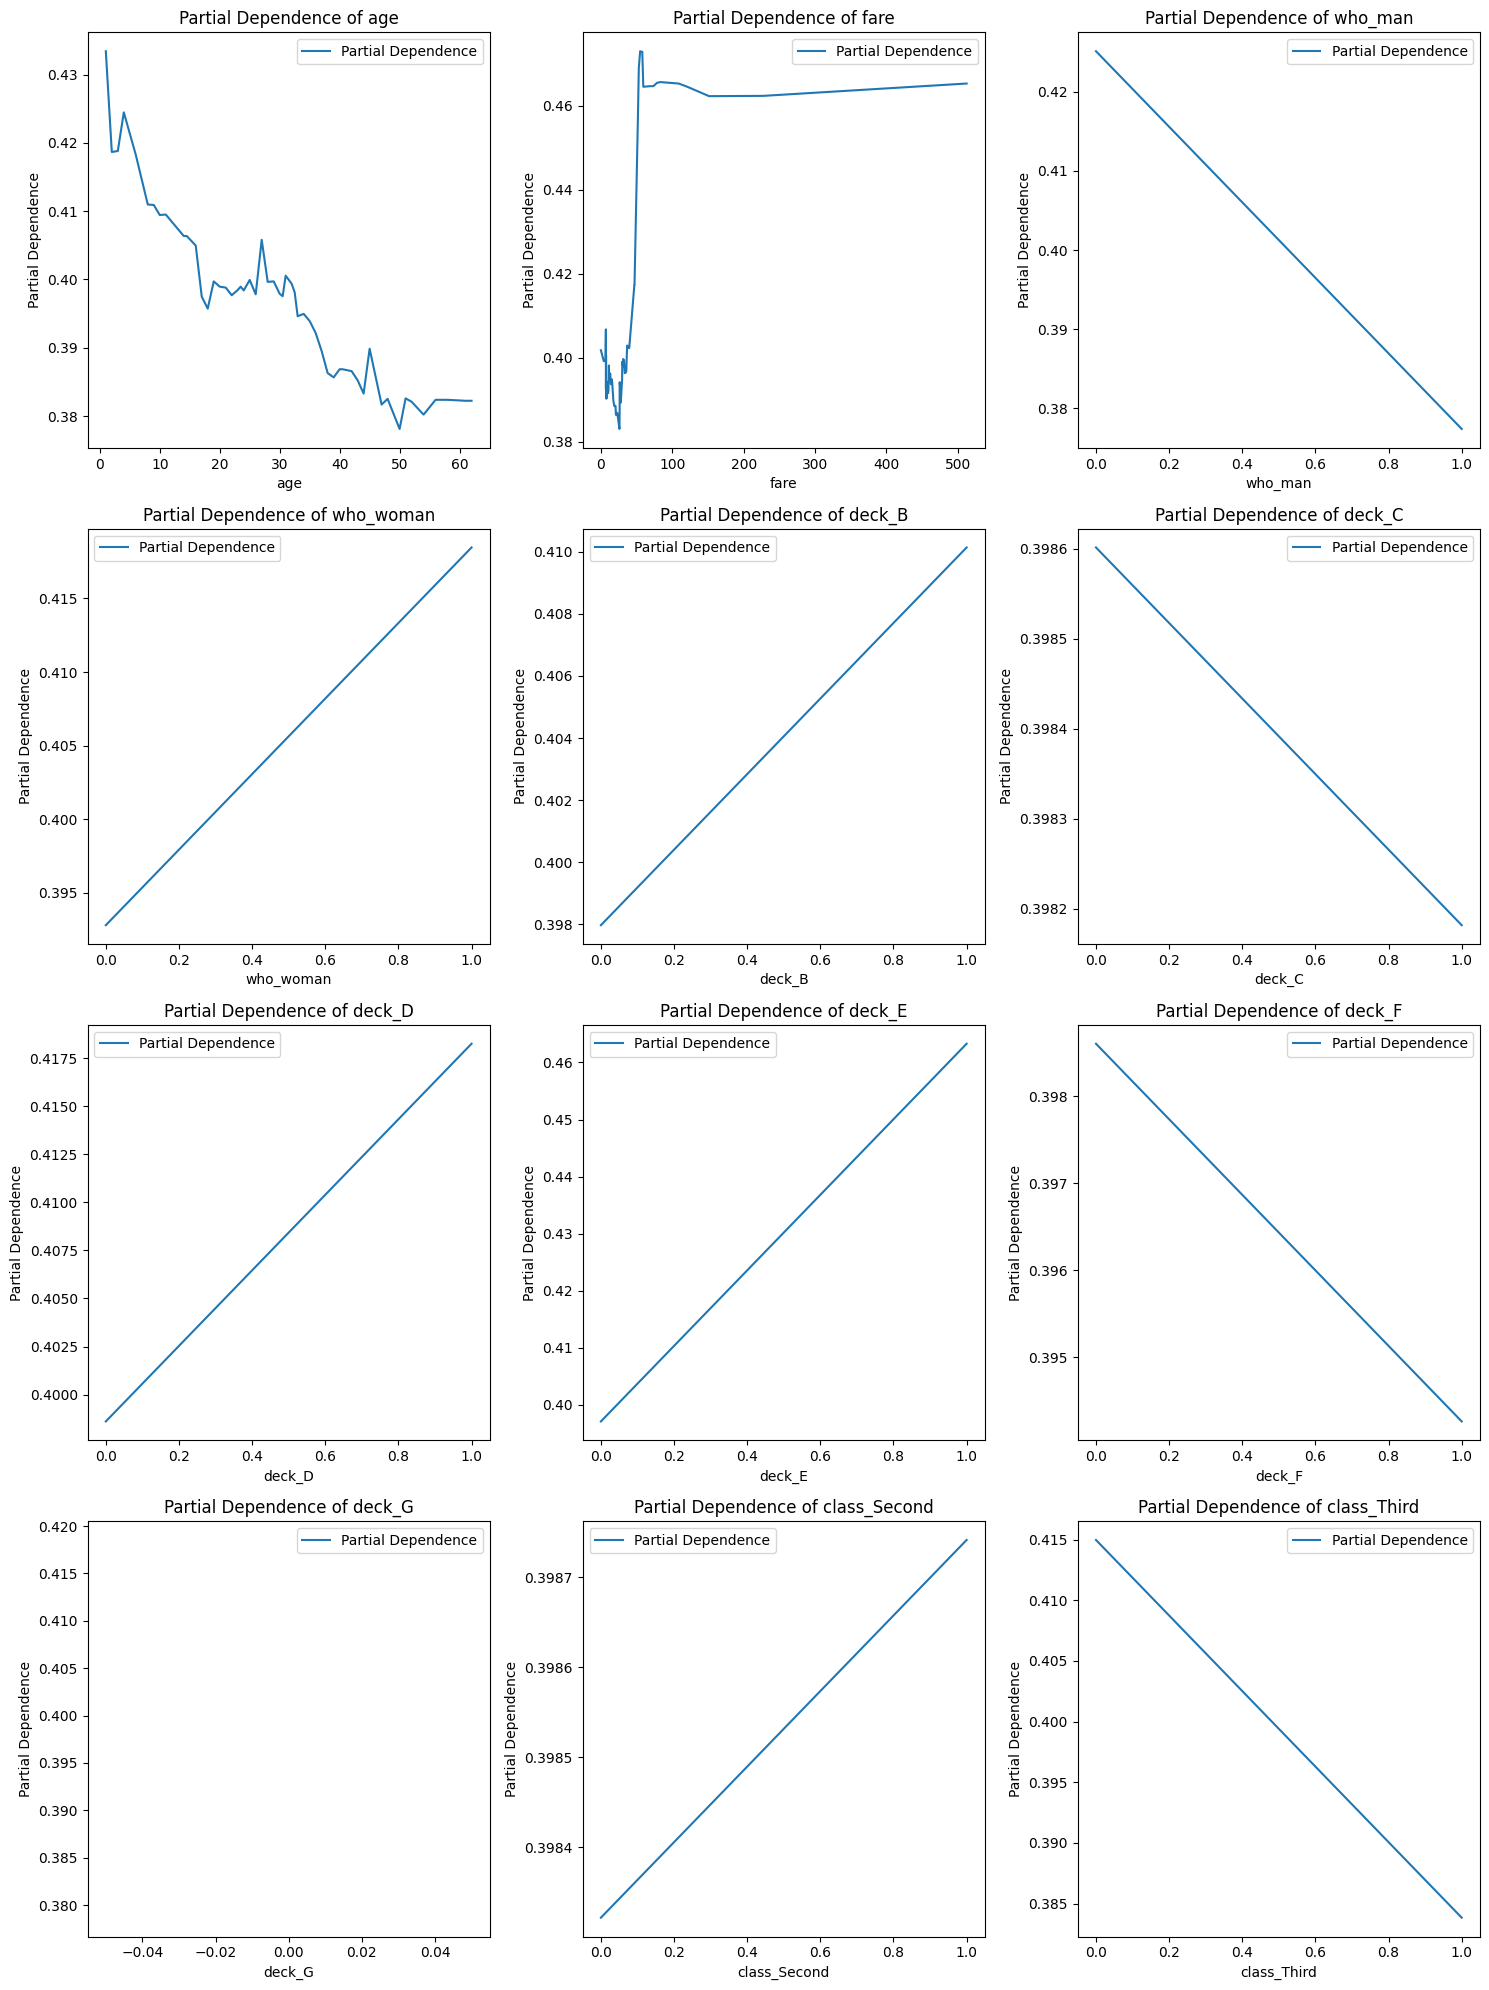

In [33]:
# Define the features you want to visualize
features = ['age', 'fare', 'who_man', 'who_woman', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'class_Second', 'class_Third']
n_features = len(features)

# Define the number of rows and columns for the plot grid
n_rows = 4
n_cols = 3

# Create the figure with a grid of subplots
plt.figure(figsize=(n_cols * 5, n_rows * 5))

# Loop over the features to plot each partial dependence
plot_idx = 1
for feature in features:
    # Create a subplot for each feature
    plt.subplot(n_rows, n_cols, plot_idx)

    # Compute the partial dependence for the given feature
    pd_results = partial_dependence(model, X=X_test, features=[feature])

    # Extract the grid of feature values and corresponding partial dependence values
    grid_values = pd_results['values'][0]
    pd_values = pd_results['average'][0]

    # Plot the partial dependence
    plt.plot(grid_values, pd_values, label='Partial Dependence')

    # Use the feature name in the title and labels
    plt.title(f"Partial Dependence of {feature}")
    plt.ylabel('Partial Dependence')
    plt.xlabel(feature)
    plt.legend()

    plot_idx += 1

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

/Users/akalpitdawkhar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/akalpitdawkhar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/akalpitdawkhar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/akalpitdawkhar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/akalpitdawkhar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

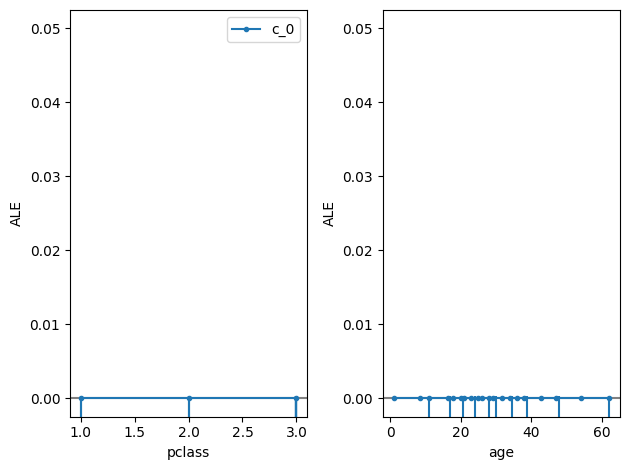

In [6]:
# ALE (Using alibi for ALE)
ale_explainer = ALE(model.predict, feature_names=X_test.columns.tolist())
ale_explanation = ale_explainer.explain(X_test.values)

# Plot ALE for the first two features
plot_ale(ale_explanation, features=[0, 1])  # Updated plotting function
plt.show()

In [13]:
# Let's say we want to plot ICE for the first feature
feature = X_test.columns[0]

# Generate ICE data
ice_df = ice(data=X_test, column=feature, predict=model.predict)

# Create ICE plot
ice_plot(ice_df, c='dimgray', linewidth=0.3)
plt.ylabel('Model prediction')
plt.xlabel('Feature value')
plt.title('ICE plot for feature: {}'.format(feature))
plt.show()

NameError: name 'ice' is not defined

In [7]:
# Display model evaluation report (Optional)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        56

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143



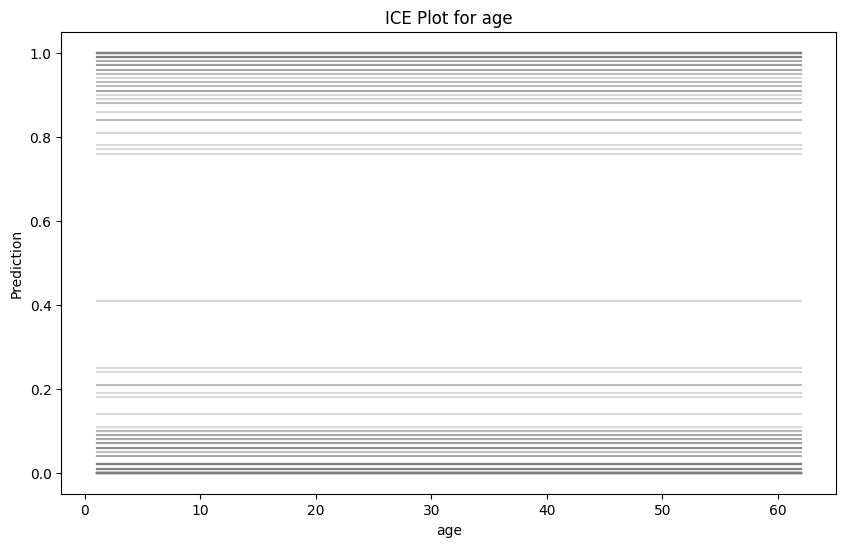

In [15]:
# Custom ICE Plot Implementation for 'age' Feature

def plot_ice(model, X, feature_name, feature_range=None):
    """
    Plots ICE curves for a specific feature by iterating through its range of values.
    """
    if feature_range is None:
        feature_range = np.linspace(X[feature_name].min(), X[feature_name].max(), num=50)
    
    X_temp = X.copy()

    plt.figure(figsize=(10, 6))

    for i in range(len(X)):
        y_pred = []
        for val in feature_range:
            X_temp.loc[i, feature_name] = val
            pred = model.predict_proba(X_temp.iloc[[i]])[:, 1]  # Probability for class 1
            y_pred.append(pred[0])

        plt.plot(feature_range, y_pred, color='gray', alpha=0.3)

    plt.title(f"ICE Plot for {feature_name}")
    plt.xlabel(feature_name)
    plt.ylabel('Prediction')
    plt.show()

# Example of plotting ICE for the 'age' feature
plot_ice(model, X_test, feature_name='age')